# **CA 04 - Ensemble Methods**

*Dataset Description:*

The dataset is obtained from the Census Bureau and represents salaries of people along with seven demographic variables. The following is a description of our dataset:

• Number of target classes: 2 ('>50K' and '<=50K') [ Labels: 1, 0 ]

• Number of attributes (Columns): 7

• Number of instances (Rows): 48,842

# **1. Data Source and Contents**

**Importing the Data**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score



url = 'https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true'
df = pd.read_csv(url)

print(df.head())


  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  


**Basic Data Cleaning and Transformations (from CA 03)**

In [ ]:
#Taking a count of all of our variables
df.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [ ]:
#Looking at how many null values we have:
df.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [ ]:
#Looking into the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
#Inspecting our census data:
df.describe(exclude=[np.number])

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,5,5,3,3,3,5,5,2,5,2
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561


# **2. Finding Optimal Value of a key Ensemble Method Hyperparameter**

In [ ]:
#Encoding our categorical variables into dummies using: One-Hot/Dummy Encoding Technique
columns_new = ["workclass_bin", "education_num_bin", "education_bin", "msr_bin", "age_bin", "race_sex_bin",
                  "capital_gl_bin", "occupation_bin", "hours_per_week_bin"]
new_df = pd.get_dummies(df, columns=columns_new)
new_df.head(5)

,flag,y,workclass_bin_a. no income,workclass_bin_b. income,education_num_bin_a. 0-8,education_num_bin_b. 9-12,education_num_bin_c. 13,education_num_bin_d. 14,education_num_bin_e. 15+,education_bin_a. Low,...,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60
0,train,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,train,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,train,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,train,0,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,train,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
#split the train and the test data for usage
split = new_df['flag'].unique()
print(split)

for value in split:
    train_data = new_df[new_df['flag']== 'train']
    test_data = new_df[new_df['flag']== 'test']

['train' 'test']


In [ ]:
#dropping flag variable, not needed anymore since the split
train_data.drop(columns='flag', inplace=True)
test_data.drop(columns='flag', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
#checking to make sure the train data presents itself properly
train_data.head(10)

,y,workclass_bin_a. no income,workclass_bin_b. income,education_num_bin_a. 0-8,education_num_bin_b. 9-12,education_num_bin_c. 13,education_num_bin_d. 14,education_num_bin_e. 15+,education_bin_a. Low,education_bin_b. Mid,...,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60
0,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
6,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
7,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
8,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
#checking to make sure the test data presents itself properly
test_data.head(10)

,y,workclass_bin_a. no income,workclass_bin_b. income,education_num_bin_a. 0-8,education_num_bin_b. 9-12,education_num_bin_c. 13,education_num_bin_d. 14,education_num_bin_e. 15+,education_bin_a. Low,education_bin_b. Mid,...,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60
32561,0,0,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
32562,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
32563,1,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
32564,1,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
32565,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
32566,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
32567,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
32568,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
32569,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
32570,0,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
#Grouping all of our categorical variables in the dataset
categorical = ['age_bin', 'capital_gl_bin', 'education_bin', 'hours_per_week_bin', 'msr_bin','race_sex_bin','occupation_bin']

In [ ]:
#Making y the target variable of our train and test data by extracting it
y_test = test_data['y']

y_train = train_data['y']

x_train = train_data.drop('y', axis=1)

x_test = test_data.drop('y', axis=1)

# **3. Building a Random Forest Model**

Accuracy vs. n_estimators Graph

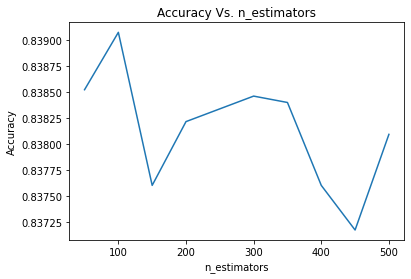

In [ ]:
# Define list of n_estimators values to test
n_estimators_values = [50,100,150,200,250,300,350,400,450,500]

# Initialize lists to store accuracy scores and AUC values
accuracy_scores = []

# Train and test Random Forest classifiers with different n_estimators values
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
# Plot the accuracy scores for each n_estimators value
plt.plot(n_estimators_values, accuracy_scores)
plt.title('Accuracy Vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()


AUC vs. n_estimators Graph

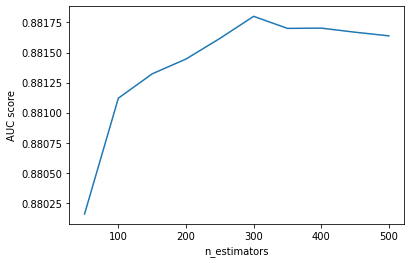

In [ ]:
# Define the range of n_estimators values to test
n_estimators_range = [50,100,150,200,250,300,350,400,450,500]

# Initialize an empty list to store the AUC scores
auc_scores = []

# Loop over the different n_estimators values
for n_estimators in n_estimators_range:
    
    # Initialize a Random Forest classifier with the current n_estimators value
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    
    # Fit the classifier to the training data
    rf.fit(x_train, y_train)
    
    # Predict the class probabilities of the test data
    y_pred_proba = rf.predict_proba(x_test)[:, 1]
    
    # Calculate the AUC score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Add the AUC score to the list
    auc_scores.append(auc_score)

# Plot the AUC scores vs. the n_estimators values
plt.plot(n_estimators_range, auc_scores)
plt.xlabel('n_estimators')
plt.ylabel('AUC score')
plt.show()


**Answer the following questions:**

**1. Write your observations about the Classifier’s behavior with respect to the number of estimators?**

Based on the behavior of the Random Forest classifier with respect to the number of estimators, we can observe that as the number of estimators increases, the AUC score of the model tends to increase and then plateau. As for accuracy, it looks like the n_estimators fluctuates quite a bit. This suggests that adding more trees beyond a certain point does not significantly improve the model's performance.


**2. Is there an optimal value of the estimator within the given range?**

Yes. Based on the line charts of accuracy and AUC score, we can observe that there is an optimal value of the estimator within the given range. For accuracy, the optimal value of the estimator would be 100 and as for AUC score it would be 300 or 300-400 estimators.

# **4. Building AdaBoost, Gradient Boost, and XGB**

# *Building: AdaBoost*

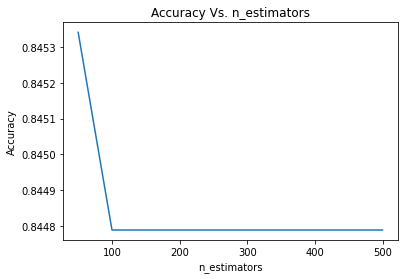

In [ ]:
# Define list of n_estimators values to test
n_estimators_values = [50,100,150,200,250,300,350,400,450,500]

# Initialize lists to store accuracy scores and AUC values
accuracy_scores = []

# Train and test Random Forest classifiers with different n_estimators values
for n in n_estimators_values:
    Ada = AdaBoostClassifier(n_estimators=n, random_state=42)
    Ada.fit(x_train, y_train)
    y_pred = Ada.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
# Plot the accuracy scores for each n_estimators value
plt.plot(n_estimators_values, accuracy_scores)
plt.title('Accuracy Vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

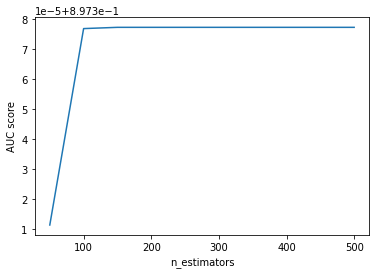

In [ ]:
# Define the range of n_estimators values to test
n_estimators_range = [50,100,150,200,250,300,350,400,450,500]

# Initialize an empty list to store the AUC scores
auc_scores = []

# Loop over the different n_estimators values
for n_estimators in n_estimators_range:
    
    # Initialize a Random Forest classifier with the current n_estimators value
    Ada = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    
    # Fit the classifier to the training data
    Ada.fit(x_train, y_train)
    
    # Predict the class probabilities of the test data
    y_pred_proba = Ada.predict_proba(x_test)[:, 1]
    
    # Calculate the AUC score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Add the AUC score to the list
    auc_scores.append(auc_score)

# Plot the AUC scores vs. the n_estimators values
plt.plot(n_estimators_range, auc_scores)
plt.xlabel('n_estimators')
plt.ylabel('AUC score')
plt.show()

**Answer the following questions:**

**1. Write your observations about the Classifier’s behavior with respect to the number of estimators?**

Based on the behavior of the AdaBoost classifier with respect to the number of estimators, we can observe that the accuracy is higher when there are less than 100 estimators and then plateaus.The AUC score of the model steadily increases before plateuing at 100 estimators showing it is the threshold. This suggests that adding more trees beyond a certain point does not significantly improve the model's performance.

**2. Is there an optimal value of the estimator within the given range?**

Yes. Based on the line charts of accuracy and AUC score, we can observe that there is an optimal value of the estimator within the given range. For accuracy, the optimal value would be 50 or less estimators and as for AUC score it would be 100 or 100+ estimators.

# *Building: Gradient Boost*

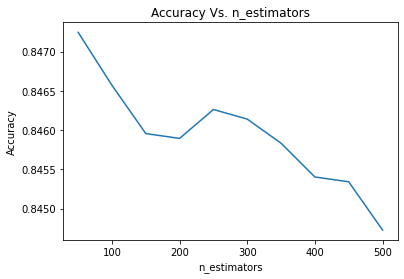

In [ ]:
# Define list of n_estimators values to test
n_estimators_values = [50,100,150,200,250,300,350,400,450,500]

# Initialize lists to store accuracy scores and AUC values
accuracy_scores = []

# Train and test Random Forest classifiers with different n_estimators values
for n in n_estimators_values:
    GradientBoost = GradientBoostingClassifier(n_estimators=n, random_state=42)
    GradientBoost.fit(x_train, y_train)
    y_pred = GradientBoost.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
# Plot the accuracy scores for each n_estimators value
plt.plot(n_estimators_values, accuracy_scores)
plt.title('Accuracy Vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

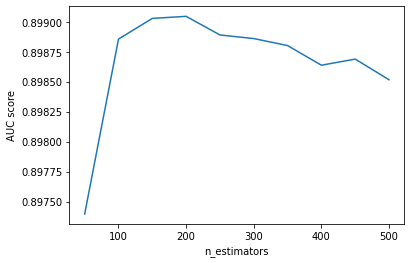

In [ ]:
# Define the range of n_estimators values to test
n_estimators_range = [50,100,150,200,250,300,350,400,450,500]

# Initialize an empty list to store the AUC scores
auc_scores = []

# Loop over the different n_estimators values
for n_estimators in n_estimators_range:
    
    # Initialize a Random Forest classifier with the current n_estimators value
    GradientBoost = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    
    # Fit the classifier to the training data
    GradientBoost.fit(x_train, y_train)
    
    # Predict the class probabilities of the test data
    y_pred_proba = GradientBoost.predict_proba(x_test)[:, 1]
    
    # Calculate the AUC score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Add the AUC score to the list
    auc_scores.append(auc_score)

# Plot the AUC scores vs. the n_estimators values
plt.plot(n_estimators_range, auc_scores)
plt.xlabel('n_estimators')
plt.ylabel('AUC score')
plt.show()

**Answer the following questions:**

**1. Write your observations about the Classifier’s behavior with respect to the number of estimators?**

Based on the behavior of the GradientBoost classifier with respect to the number of estimators, we can observe that as the accuracy is higher when there are less than 100 estimators and then is fluctuates at a decline. The AUC score of the model steadily increases before reaching 100 estimators and increasing a bit more before incrementally declining. This suggests that adding more trees beyond a certain point does not significantly improve the model's performance.

**2. Is there an optimal value of the estimator within the given range?**

Yes. Based on the line charts of accuracy and AUC score, we can observe that there is an optimal value of the estimator within the given range. For accuracy, the optimal value would be 100 or less estimators and as for AUC score it would be 100-250 estimators.

# *Building: XGB*

In [ ]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


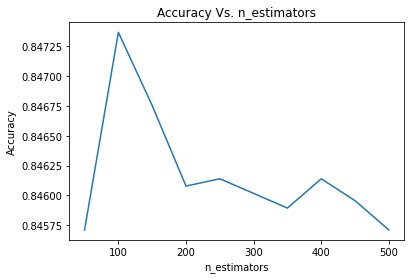

In [ ]:
# Define list of n_estimators values to test
n_estimators_values = [50,100,150,200,250,300,350,400,450,500]

# Initialize lists to store accuracy scores and AUC values
accuracy_scores = []

# Rename columns to remove brackets and < > characters
x_train.columns = [c.replace('[','').replace(']','').replace('<','_').replace('>','_') for c in x_train.columns]
x_test.columns = [c.replace('[','').replace(']','').replace('<','_').replace('>','_') for c in x_test.columns]


# Train and test Random Forest classifiers with different n_estimators values
for n in n_estimators_values:
    xgb = XGBClassifier(n_estimators=n, random_state=42)
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
# Plot the accuracy scores for each n_estimators value
plt.plot(n_estimators_values, accuracy_scores)
plt.title('Accuracy Vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()


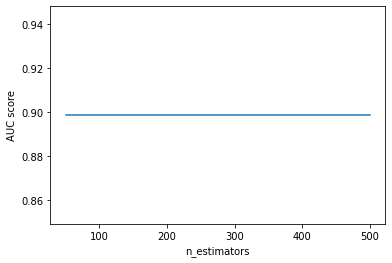

In [26]:
# Define the range of n_estimators values to test
n_estimators_range = [50,100,150,200,250,300,350,400,450,500]

# Initialize an empty list to store the AUC scores
auc_scores = []

# Loop over the different n_estimators values
for n_estimators in n_estimators_range:
    xgb = XGBClassifier(n_estimators=n, random_state=42)
    xgb.fit(x_train, y_train)

    # Predict the class probabilities of the test data
    y_pred_proba = xgb.predict_proba(x_test)[:, 1]
    
    # Calculate the AUC score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Add the AUC score to the list
    auc_scores.append(auc_score)

# Plot the AUC scores vs. the n_estimators values
plt.plot(n_estimators_range, auc_scores)
plt.xlabel('n_estimators')
plt.ylabel('AUC score')
plt.show()

**Answer the following questions:**

**1. Write your observations about the Classifier’s behavior with respect to the number of estimators?**

Based on the behavior of the XGB classifier with respect to the number of estimators, we can observe that as the accuracy is highest as it approaches 100 estimators and the sharply declines. The AUC score of the model stays consitent regardless of the number of estimators. This suggests that adding more trees beyond a certain point does not significantly improve the model's performance.

**2. Is there an optimal value of the estimator within the given range?**

Yes. Based on the line charts of accuracy and AUC score, we can observe that there is an optimal value of the estimator within the given range. For accuracy, the optimal value would be 100 estimators and as for AUC score it would be any number of estimators since the AUC score is not changing.

# **5. Compare Performance**

Random Forest Accuracy and AUC Performance

In [28]:
#Accuracy Score---------------------------
# Define list of n_estimators values to test
n_estimators_values = [50,100,150,200,250,300,350,400,450,500]

# Initialize lists to store accuracy scores and AUC values
accuracy_scores = []

# Train and test Random Forest classifiers with different n_estimators values
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

accuracy_rf = np.argmax(accuracy_scores)

print("Accuracy for Random Forest:", accuracy_scores[accuracy_rf])
print("Number of estimators:", n_estimators_values[accuracy_rf])
  


Accuracy for Random Forest: 0.8390762238191757
Number of estimators: 100


In [31]:
#AUC Score ---------------------------------------
# Define the range of n_estimators values to test
n_estimators_range = [50,100,150,200,250,300,350,400,450,500]

# Initialize an empty list to store the AUC scores
auc_scores = []

# Loop over the different n_estimators values
for n_estimators in n_estimators_range:
    
    # Initialize a Random Forest classifier with the current n_estimators value
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    
    # Fit the classifier to the training data
    rf.fit(x_train, y_train)
    
    # Predict the class probabilities of the test data
    y_pred_proba = rf.predict_proba(x_test)[:, 1]
    
    # Calculate the AUC score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Add the AUC score to the list
    auc_scores.append(auc_score)
  
    auc_score_index = np.argmax(auc_scores)

print("AUC Score for Random Forest:", auc_scores[auc_score_index])
print("Number of estimators:", n_estimators_range[auc_score_index])

AUC Score for Random Forest: 0.8818005892732694
Number of estimators: 300


AdaBoost Accuracy and AUC Performance

In [34]:
#Accuracy Score -----------------------------------------------------------
# Define list of n_estimators values to test
n_estimators_values = [50,100,150,200,250,300,350,400,450,500]

# Initialize lists to store accuracy scores and AUC values
accuracy_scores = []

# Train and test Random Forest classifiers with different n_estimators values
for n in n_estimators_values:
    Ada = AdaBoostClassifier(n_estimators=n, random_state=42)
    Ada.fit(x_train, y_train)
    y_pred = Ada.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

accuracy_ada = np.argmax(accuracy_scores)

print("Accuracy for AdaBoost:", accuracy_scores[accuracy_ada])
print("Number of estimators:", n_estimators_values[accuracy_ada])


Accuracy for AdaBoost: 0.8453411952582766
Number of estimators: 50


In [33]:
#AUC Score ---------------------------------------------------------------
# Define the range of n_estimators values to test
n_estimators_range = [50,100,150,200,250,300,350,400,450,500]

# Initialize an empty list to store the AUC scores
auc_scores = []

# Loop over the different n_estimators values
for n_estimators in n_estimators_range:
    
    # Initialize a Random Forest classifier with the current n_estimators value
    Ada = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    
    # Fit the classifier to the training data
    Ada.fit(x_train, y_train)
    
    # Predict the class probabilities of the test data
    y_pred_proba = Ada.predict_proba(x_test)[:, 1]
    
    # Calculate the AUC score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Add the AUC score to the list
    auc_scores.append(auc_score)

auc_score_index = np.argmax(auc_scores)

print("AUC Score for AdaBoost:", auc_scores[auc_score_index])
print("Number of estimators:", n_estimators_range[auc_score_index])

  

AUC Score for AdaBoost: 0.8973772718500216
Number of estimators: 150


GradientBoost Accuracy and AUC Performance

In [36]:
#Accuracy Score ---------------------------------------------------------------
# Define list of n_estimators values to test
n_estimators_values = [50,100,150,200,250,300,350,400,450,500]

# Initialize lists to store accuracy scores and AUC values
accuracy_scores = []

# Train and test Random Forest classifiers with different n_estimators values
for n in n_estimators_values:
    GradientBoost = GradientBoostingClassifier(n_estimators=n, random_state=42)
    GradientBoost.fit(x_train, y_train)
    y_pred = GradientBoost.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

accuracy_gradient = np.argmax(accuracy_scores)

print("Accuracy for Gradient:", accuracy_scores[accuracy_gradient])
print("Number of estimators:", n_estimators_values[accuracy_gradient])

Accuracy for Gradient: 0.8472452552054542
Number of estimators: 50


In [37]:
#AUC Score -------------------------------------------------------------------
# Define the range of n_estimators values to test
n_estimators_range = [50,100,150,200,250,300,350,400,450,500]

# Initialize an empty list to store the AUC scores
auc_scores = []

# Loop over the different n_estimators values
for n_estimators in n_estimators_range:
    
    # Initialize a Random Forest classifier with the current n_estimators value
    GradientBoost = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    
    # Fit the classifier to the training data
    GradientBoost.fit(x_train, y_train)
    
    # Predict the class probabilities of the test data
    y_pred_proba = GradientBoost.predict_proba(x_test)[:, 1]
    
    # Calculate the AUC score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Add the AUC score to the list
    auc_scores.append(auc_score)

auc_score_index = np.argmax(auc_scores)

print("AUC Score for GradientBoost:", auc_scores[auc_score_index])
print("Number of estimators:", n_estimators_range[auc_score_index])



AUC Score for GradientBoost: 0.8990456248728438
Number of estimators: 200


XGB Accuracy and AUC Performance

In [38]:
#Accuracy Score ---------------------------------------------------------------
# Define list of n_estimators values to test
n_estimators_values = [50,100,150,200,250,300,350,400,450,500]

# Initialize lists to store accuracy scores and AUC values
accuracy_scores = []

# Rename columns to remove brackets and < > characters
x_train.columns = [c.replace('[','').replace(']','').replace('<','_').replace('>','_') for c in x_train.columns]
x_test.columns = [c.replace('[','').replace(']','').replace('<','_').replace('>','_') for c in x_test.columns]


# Train and test Random Forest classifiers with different n_estimators values
for n in n_estimators_values:
    xgb = XGBClassifier(n_estimators=n, random_state=42)
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

accuracy_XGB = np.argmax(accuracy_scores)

print("Accuracy for XGB:", accuracy_scores[accuracy_XGB])
print("Number of estimators:", n_estimators_values[accuracy_XGB])



Accuracy for XGB: 0.8473680977826915
Number of estimators: 100


In [39]:
#AUC Score --------------------------------------------------------------------
# Define the range of n_estimators values to test
n_estimators_range = [50,100,150,200,250,300,350,400,450,500]

# Initialize an empty list to store the AUC scores
auc_scores = []

# Loop over the different n_estimators values
for n_estimators in n_estimators_range:
    xgb = XGBClassifier(n_estimators=n, random_state=42)
    xgb.fit(x_train, y_train)

    # Predict the class probabilities of the test data
    y_pred_proba = xgb.predict_proba(x_test)[:, 1]
    
    # Calculate the AUC score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Add the AUC score to the list
    auc_scores.append(auc_score)

auc_score_index = np.argmax(auc_scores)

print("AUC Score for XGB:", auc_scores[auc_score_index])
print("Number of estimators:", n_estimators_range[auc_score_index])

AUC Score for XGB: 0.8987029171556891
Number of estimators: 50


In [41]:
#Creating the table to display all the Accuracy and AUC Scores
data = {' ': ['Random Forest', 'AdaBoost', 'Gradient Boost', 'XGB'],
        'Accuracy': [0.83895, 0.84534, 0.84726, 0.84737],
        'AUC Score': [0.881867, 0.89738, 0.89905, 0.89870]}

all_scores = pd.DataFrame(data)
all_scores = all_scores.set_index(' ').T
all_scores

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.838950,0.84534,0.84726,0.84737
AUC Score,0.881867,0.89738,0.89905,0.89870


Gradient Boost is the best model since it had both the highest Accuracy and AUC Score overall